In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("Data/loan.csv")
df.head()

C:\Users\Sameer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- There are 111 columns in the given dataset

In [3]:
##find columns with 100% missing values
missing = 100*(df.isnull().sum()/df.shape[0]).to_frame()
missing = missing[missing[0]==100]
missing.shape

(54, 1)

In [4]:
## names of above 54 columns
list(missing.index)

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [5]:
#drop the above columns
df.drop(columns=list(missing.index),inplace=True)

In [6]:
#remaining columns
len(df.columns)

57

- We are now left with 57 columns after dropping 54 of columns with no data

In [7]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


### Dropping below columns:
- Cannot predict next_payment_date, so it's better to drop the column which has 97.129693% of missing data
- Months since last record, this field has 92.985372% of missing data. We do not know what NA means here. So dropping it.
- mths_since_last_delinq has 65% of missing data, and this field isn't that relevant to work with only 35% available data.
- desc, its just description/reason for the loan.
- emp_title is not relevant here so dropping it

In [8]:
df.drop(columns=["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","mths_since_last_record","desc","emp_title"],inplace=True)

In [9]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195
title,0.027696
last_credit_pull_d,0.005036
total_rec_prncp,0.000000


In [10]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [11]:
## creating a new category for missing values of employment experience
df.emp_length.fillna("Not Available",inplace=True)

In [12]:
## bankruptcies vs loan_status to impute missing values, we assume if NA in pub_rec_bankruptcies then we will check 
## if the person has fully paid the loan or is paying we replace with 0, else drop, because though he is a defaulter he can still have 0 bankruptcies
temp = df.loc[:,["pub_rec_bankruptcies","loan_status"]]
temp.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [13]:
## checking the categories in missing bankrupties
temp[temp.pub_rec_bankruptcies.isnull()].loan_status.value_counts()

Fully Paid     579
Charged Off    118
Name: loan_status, dtype: int64

In [14]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

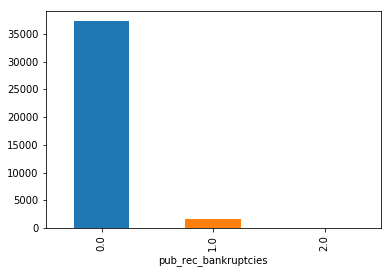

In [15]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count().plot.bar()

In [16]:
## checking the number of fully paid people with respect to their bankruptcies
temp[(temp.pub_rec_bankruptcies == 1) | (temp.pub_rec_bankruptcies == 2)].loan_status.value_counts()

Fully Paid     1274
Charged Off     368
Current          39
Name: loan_status, dtype: int64

In [17]:
## can 0 be replaced for NAs if they have fully paid the loans? Get the count of majority
temp[(temp.pub_rec_bankruptcies == 0)].loan_status.value_counts()

Fully Paid     31097
Charged Off     5141
Current         1101
Name: loan_status, dtype: int64

- We will now replace NAs where they have fully paid , with 0 bankrupties as we saw above that majority of them with 0 bankrupties have paid their loans
- We will drop the missing NAs in pub_rec_bankruptcies if they have been charged_off for their loans. This is because, we dont want to deal with such data as there are no evident proofs to impute right values in pub_rec_bankruptcies.

In [19]:
## Replace/Drop based on above assumptions
def replace_na_pub_rec_bankruptcies(x,y):
    if np.isnan(y):
        if x == "Fully Paid":
            return 0
        else:
            return y
    else:
        return y


df_temp = df

##replace values
df_temp["pub_rec_bankruptcies"] = df_temp.apply(lambda x: replace_na_pub_rec_bankruptcies(x.loan_status,x.pub_rec_bankruptcies),axis=1)
print(df_temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count())

##drop remaining
df_temp = df_temp[~df_temp.pub_rec_bankruptcies.isnull()]

df = df_temp


pub_rec_bankruptcies
0.0    37918
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc 